In [2]:
from sklearn.datasets import load_iris  # -> Classic dataset of iris flowers (includes features like sepal length, sepal width, petal length, petal width, and their species)
from sklearn.model_selection import train_test_split  # -> Splits the dataset into training and testing sets

In [3]:
# Load the Iris dataset as (X, y) instead of a full Bunch object
X, y = load_iris(return_X_y=True)

# X -> Feature matrix (150 rows × 4 columns)
#       Each row = one flower sample
#       Each column = one feature (sepal length, sepal width, petal length, petal width)

# y -> Target vector (150 values)
#       Each value = the species label of the flower
#       Labels are encoded as: 0 = Setosa, 1 = Versicolor, 2 = Virginica

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# test_size=0.2 -> 20% of the data is used for testing, 80% for training
# X_train -> training features (used to train the model)
# X_test  -> testing features (used to evaluate the model)
# y_train -> training labels (correct species for training data)
# y_test  -> testing labels (correct species for testing data)

In [5]:
len(X)  
# Iris dataset has 150 samples total
# If test_size=0.2 -> 20% for testing, 80% for training
# 20% of 150 = 30 samples → used for testing
# 80% of 150 = 120 samples → used for training

150

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # -> this always returns 4 variable, so using a,b,c,d = train_test_split(... also works!

# Explanation:
# - X_train → features for training (120 samples, 80%)
# - X_test  → features for testing  (30 samples, 20%)
# - y_train → labels for training   (120 samples, 80%)
# - y_test  → labels for testing    (30 samples, 20%)

# X = features (flower measurements)
# y = labels (flower species: 0 = setosa, 1 = versicolor, 2 = virginica)

In [7]:
len(X_train)
# Returns the number of samples in the training set (Not in order, but randomly takes 120)
# For Iris dataset with test_size=0.2:
# - Total samples = 150
# - Training set = 80% of 150 = 120 samples
# So len(X_train) = 120

120

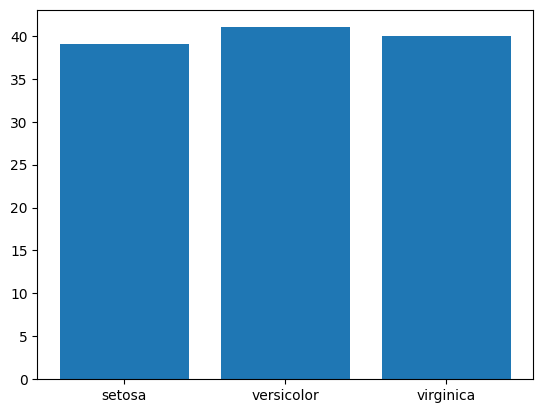

In [8]:
data = load_iris()  

# Separate into features (X) and labels/targets (y)
# - X → 2D array with shape (150, 4), each row = flower, each column = measurement
# - y → 1D array with shape (150,), each value = species encoded as 0, 1, or 2
X, y = data.data, data.target  

import numpy as np
import matplotlib.pyplot as plt

# Count how many samples of each class/species appear in y_train
# np.bincount(y_train):
#   - Takes an array of non-negative integers (here: 0, 1, 2 for the species)
#   - Returns an array where each index i holds the count of occurrences of value i
#   Example: if y_train = [0, 0, 1, 2, 2, 2]
#            np.bincount(y_train) = [2, 1, 3]
#   → meaning: 2 samples of class 0, 1 sample of class 1, 3 samples of class 2
counts = np.bincount(y_train)

positions = np.arange(3)

# Create the bar plot
# plt.bar(x_positions, heights):
#   - x_positions → where to place each bar on x-axis
#   - heights → how tall each bar should be (here: number of samples per species)
plt.bar(positions, counts)

# Set x-axis tick labels
# plt.xticks(positions, labels):
#   - positions = [0, 1, 2] (x locations)
#   - labels = species names from iris dataset → ['setosa', 'versicolor', 'virginica']
#   This replaces the default "0, 1, 2" ticks with the actual species names
plt.xticks(positions, data.target_names)

plt.show()

# As shown from the random result, even tho its balanced, the 3 chart might in some cases be unbalanced, some getting more than other

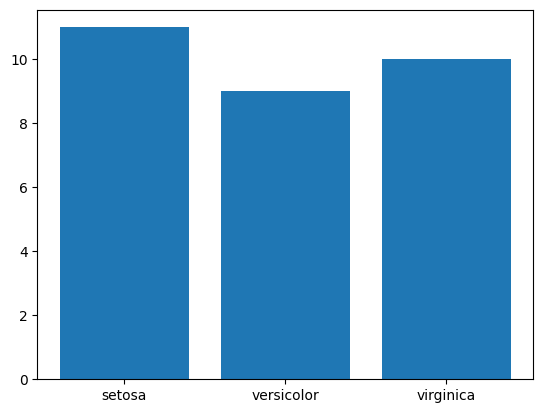

'\nExplanation:\n- Training set (120 samples) is usually balanced:\n  ~40 samples per species, so the bars look almost equal.\n\n- Test set (30 samples) is smaller, so random splitting can cause imbalance:\n  e.g., [12, 8, 10] instead of [10, 10, 10].\n\n- This imbalance appears stronger in the test set because with fewer samples,\n  even a small difference of 1–2 samples makes the bars look uneven.\n\n- To ensure both train and test sets keep the same proportions,\n  use "stratify=y" in train_test_split:\n\n    X_train, X_test, y_train, y_test = train_test_split(\n        X, y, test_size=0.2, stratify=y\n    )\n\n  With stratify=y, both sets always preserve the original 50-50-50 balance.\n'

In [9]:
data = load_iris()  
X, y = data.data, data.target  

import numpy as np
import matplotlib.pyplot as plt


counts = np.bincount(y_test)
positions = np.arange(3)


plt.bar(positions, counts)
plt.xticks(positions, data.target_names)
plt.show()

"""
Explanation:
- Training set (120 samples) is usually balanced:
  ~40 samples per species, so the bars look almost equal.

- Test set (30 samples) is smaller, so random splitting can cause imbalance:
  e.g., [12, 8, 10] instead of [10, 10, 10].

- This imbalance appears stronger in the test set because with fewer samples,
  even a small difference of 1–2 samples makes the bars look uneven.

- To ensure both train and test sets keep the same proportions,
  use "stratify=y" in train_test_split:

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y
    )

  With stratify=y, both sets always preserve the original 50-50-50 balance.
"""

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit  
# - A cross-validation splitter that splits data into train/test sets multiple times.
# - Ensures each split preserves the same class proportions (stratified).
# - Shuffles the data before splitting, giving random but balanced subsets.
# - Useful for classification tasks where class balance is important.

In [13]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
# - n_splits=1 → only perform one train/test split
# - test_size=0.2 → 20% of the data (30 samples) goes to the test set, 80% (120 samples) for training

for train_idx, test_idx in split.split(X, y):
    # split.split(X, y) generates indices for stratified train/test split
    # - train_idx → indices of training samples
    # - test_idx  → indices of testing samples
    # Both preserve the original class proportions (balanced).

    # Use the indices to create training and test sets
    X_train, X_test = X[train_idx], X[test_idx]  
    y_train, y_test = y[train_idx], y[test_idx]

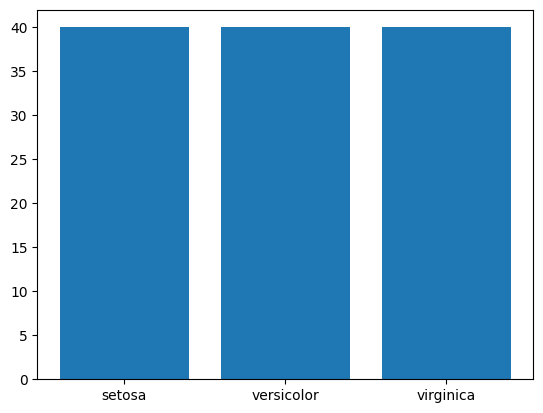

In [15]:
# Reload the cell above again, to show that its balanced now. (train)
data = load_iris()  
X, y = data.data, data.target  

import numpy as np
import matplotlib.pyplot as plt


counts = np.bincount(y_train)
positions = np.arange(3)


plt.bar(positions, counts)
plt.xticks(positions, data.target_names)
plt.show()

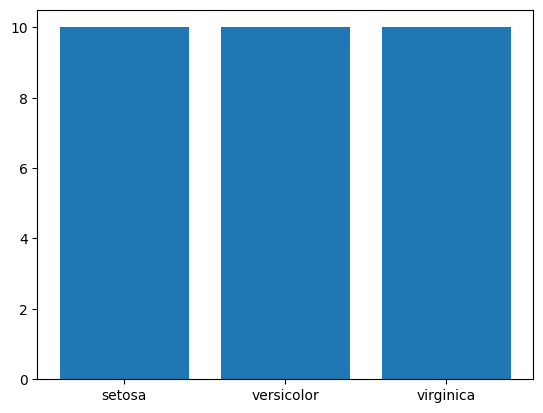

In [16]:
# Reload the cell above again, to show that its balanced now. (test)
data = load_iris()  
X, y = data.data, data.target  

import numpy as np
import matplotlib.pyplot as plt


counts = np.bincount(y_test)
positions = np.arange(3)


plt.bar(positions, counts)
plt.xticks(positions, data.target_names)
plt.show()